In [1]:
# Importing the Libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [5]:
# Loading the Dataset
data = pd.read_csv('Instagram data.csv', encoding= 'latin-1')

In [7]:
# Analyse the Top 5 rows of the Dataset
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [9]:
# Check information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [11]:
# Now let's check statistics of the Dataset
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [13]:
# Now let's check for any null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

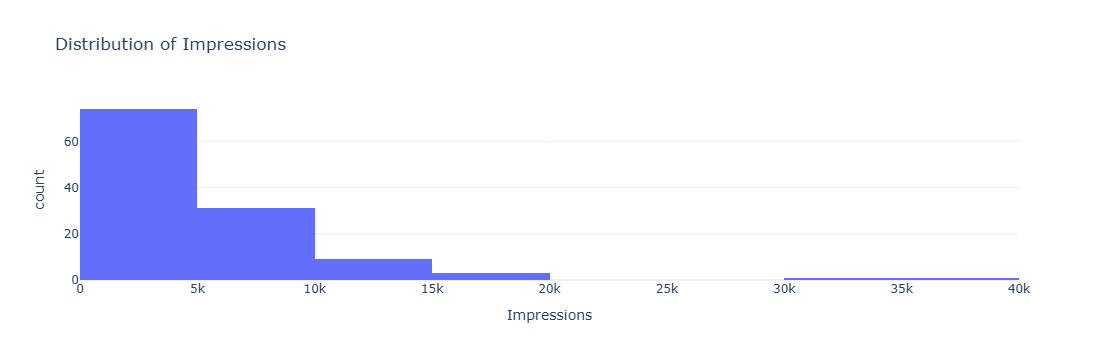

In [19]:
# let’s have a look at the distribution of the Impressions
fig = px.histogram(data, x = 'Impressions', nbins = 10, title = 'Distribution of Impressions')

fig.show()

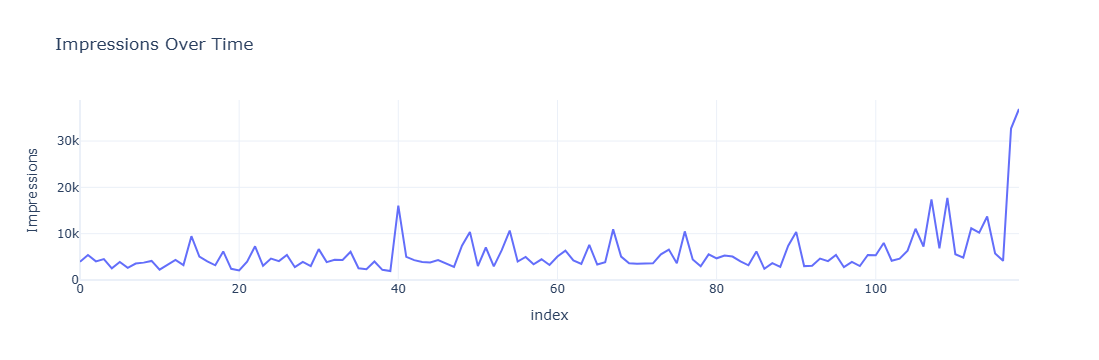

In [23]:
# Now let’s have a look at the number of impressions on each post over time
fig = px.line(data, x = data.index, y = 'Impressions', title = 'Impressions Over Time')

fig.show()

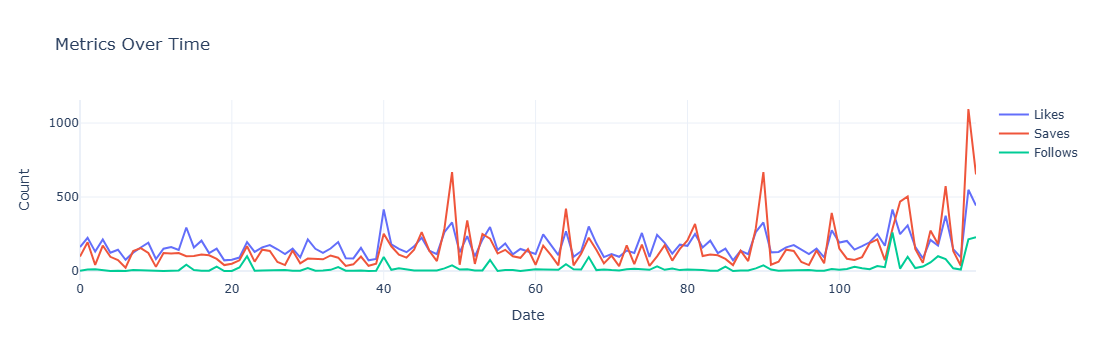

In [31]:
# Now let’s have a look at all the metrics like Likes, Saves, and Follows from each post over time
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y = data['Likes'], name = 'Likes'))
fig.add_trace(go.Scatter(x=data.index, y =data['Saves'], name = 'Saves'))
fig.add_trace(go.Scatter(x=data.index, y = data['Follows'], name = 'Follows'))

fig.update_layout(title='Metrics Over Time',
                  xaxis_title='Date',
                  yaxis_title='Count')

fig.show()

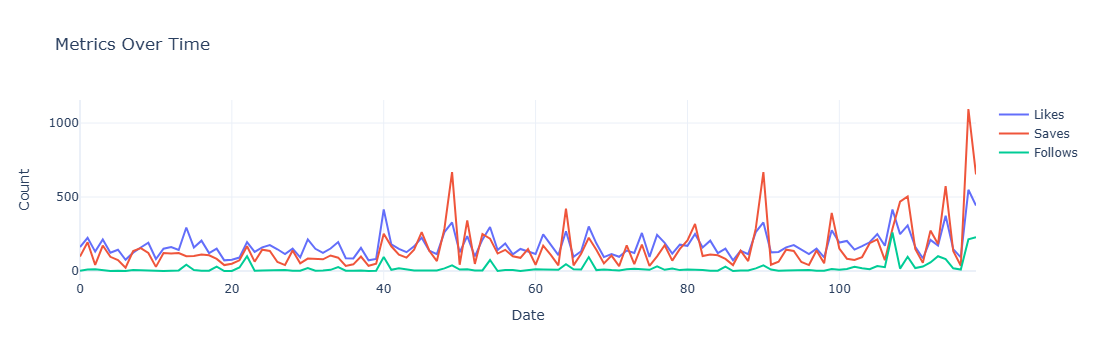

In [41]:
# Now let’s have a look at the distribution of reach from different sources

reach_source = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

reach_counts = [data[source].sum() for source in reach_source]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

px.pie(data_frame= data, names = reach_source, values = reach_counts, 
             title='Reach from Different Sources',
             color_discrete_sequence=colors)
fig.show()

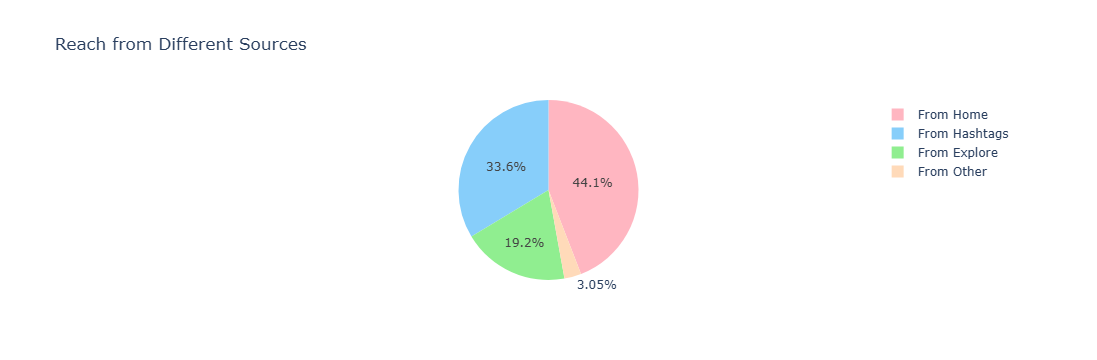

In [45]:
# Now let’s have a look at the distribution of reach from different sources
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=reach_sources, 
             values=reach_counts, 
             title='Reach from Different Sources',
             color_discrete_sequence=colors)
fig.show()

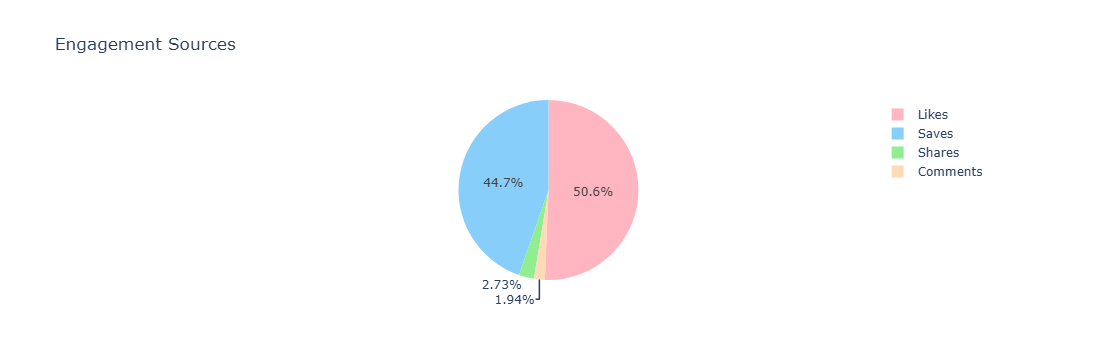

In [47]:
# Now let’s have a look at the distribution of engagement sources
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=engagement_metrics, 
             values=engagement_counts, 
             title='Engagement Sources',
             color_discrete_sequence=colors)
fig.show()

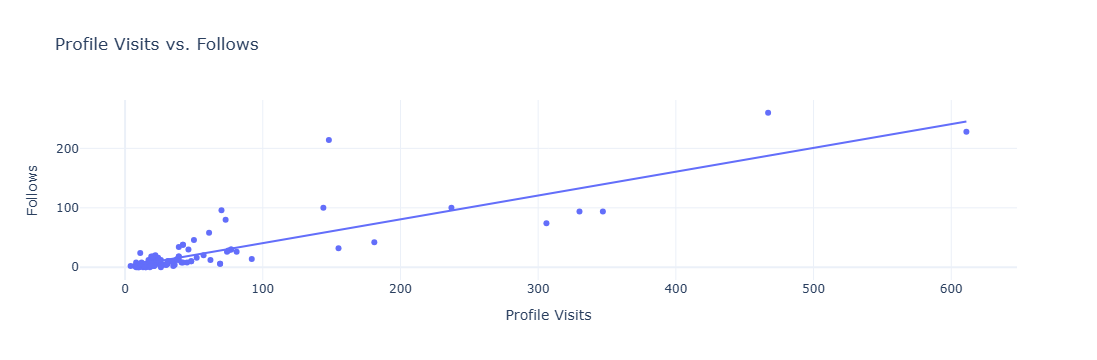

In [57]:
# Now let’s have a look at the relationship between the number of profile visits and follows
fig = px.scatter(data, x = 'Profile Visits', y = 'Follows', trendline = 'ols',  title='Profile Visits vs. Follows')

fig.show()

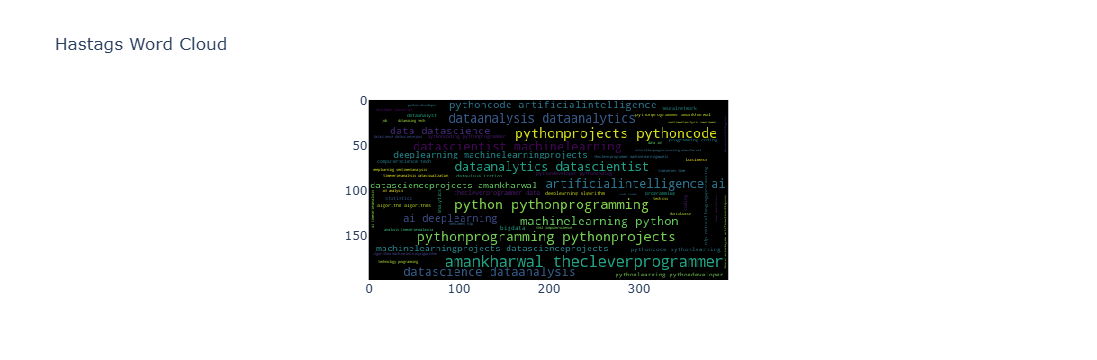

In [61]:
# Now let’s have a look at the type of hashtags used in the posts using a wordcloud
from wordcloud import WordCloud

hashtags = ' '.join(data['Hashtags'].astype(str))
wordcloud = WordCloud().generate(hashtags)

fig = px.imshow(wordcloud, title = 'Hastags Word Cloud')

fig.show()

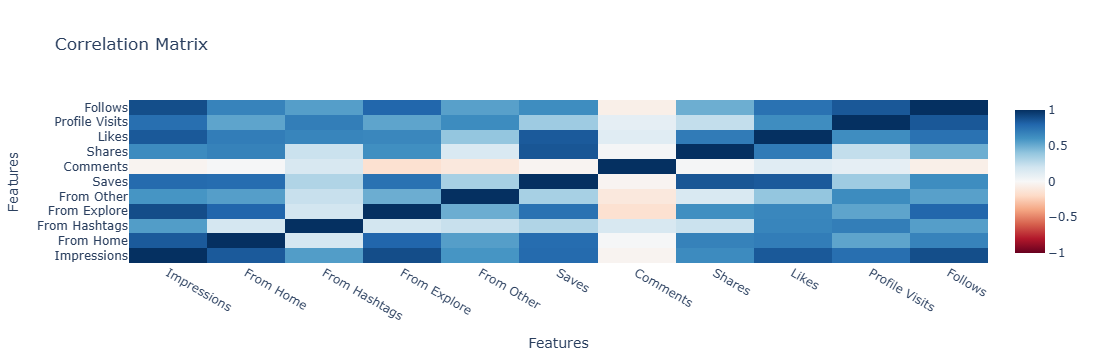

In [73]:
# Now let’s have a look at the correlation between all the features
corr_matrix = data.corr(numeric_only= True)

fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                               x=corr_matrix.columns,
                               y=corr_matrix.index,
                               colorscale='RdBu',
                               zmin=-1,
                               zmax=1))

fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

fig.show()

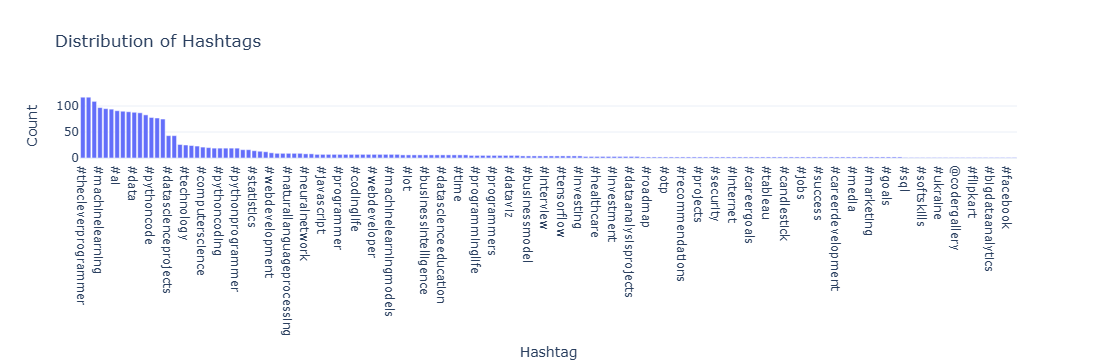

In [81]:
# Now let’s have a look at the distribution of hashtags to see which hashtag is used the most in all the posts
# Create a list to store all hashtags
all_hashtags = []

# Iterate through each row in the 'Hashtag' column
for row in data['Hashtags']:
    hashtags = str(row).split()
    hashtags = [tag.strip() for tag in hashtags]
    all_hashtags.extend(hashtags)

# Create a pandas DataFrame to store the hashtag distribution
hashtag_distribution = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_distribution.columns = ['Hashtag', 'Count']

fig = px.bar(hashtag_distribution, x = 'Hashtag', y = 'Count', title = 'Distribution of Hashtags')

fig.show()

In [83]:
# Now let’s have a look at the distribution of likes and impressions received from the presence of each hashtag on the post
# Create a dictionary to store the likes and impressions for each hashtag
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row it the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']

In [85]:
# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()),columns = ['Hashtag', 'Likes'])

In [87]:
# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

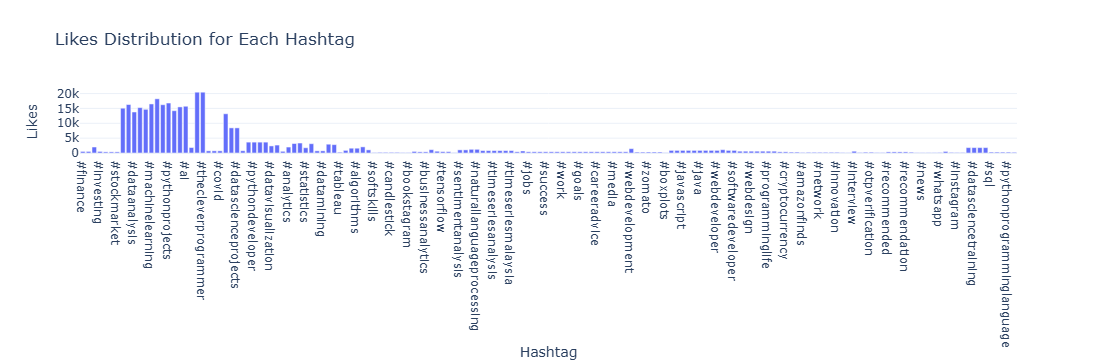

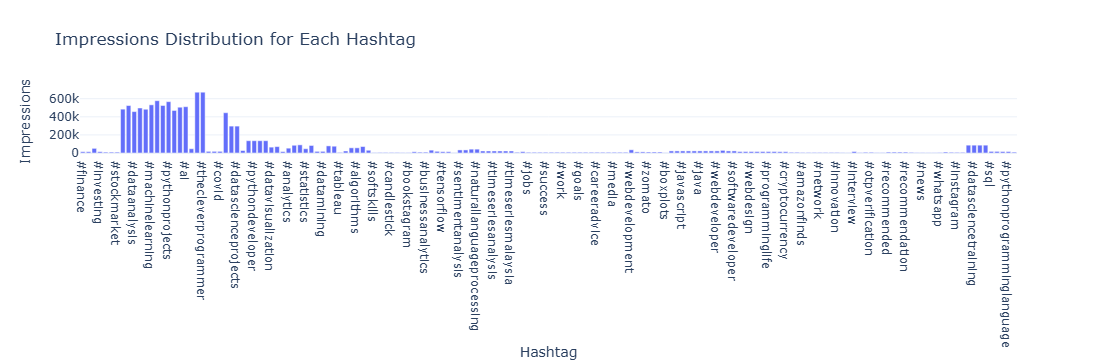

In [89]:
fig_likes = px.bar(likes_distribution, x='Hashtag', y='Likes', 
                   title='Likes Distribution for Each Hashtag')

fig_impressions = px.bar(impressions_distribution, x='Hashtag', 
                         y='Impressions', 
                         title='Impressions Distribution for Each Hashtag')

fig_likes.show()
fig_impressions.show()

#### Summary
Exploratory data analysis (EDA) is a Data Science concept where we analyze a dataset to discover patterns, trends, and relationships within the data. It helps us better understand the information contained in the dataset and guides us in making informed decisions and formulating strategies to solve real business problems.